#                                                 Diabetes

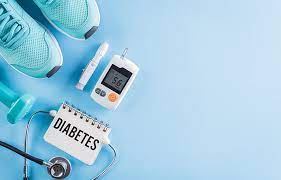

# Importing

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
#Importing the Library for Project
import os
import sys
import subprocess
import random
import time
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#  1.  Reading the data sets

1. df1
2. df2
3. df3

In [6]:
df1=pd.read_csv("C:\\Users\\kdarw\\OneDrive\\Desktop\\projects\\archive (7)\\diabetes_012_health_indicators_BRFSS2015.csv")
df3=pd.read_csv("C:\\Users\\kdarw\\OneDrive\\Desktop\\projects\\archive (7)\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df2=pd.read_csv("C:\\Users\\kdarw\\OneDrive\\Desktop\\projects\\archive (7)\\diabetes_binary_health_indicators_BRFSS2015.csv")

# 2.  Counting the population of data sets - df1, df2, df3

FINDINGS : 
  1. df1 = 253680
  2. df2 = 253680
  3. df3 = 70692

In [7]:
print(df1.shape[0])
print(df2.shape[0])
print(df3.shape[0])

253680
253680
70692


# 3.  Cleaning the Panda Dataframe : NA and NULL Values

FINDINGS:
1. There are no null values in the given 3 data sets.
2. The function isna is implemented to find out any null values

In [8]:
print(df1.isna().sum())
print(df2.isna().sum())
print(df3.isna().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0

#  4. Checking the Number of cases - Diabetes Vs Non-Diabetes

#  4.1 df1 

FINDINGS
1. 0 - 84.2%
2. 1 - 1.8%
3. 2 - 13.9%


In [14]:
axes = df1.Diabetes_012.value_counts()
axes


0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

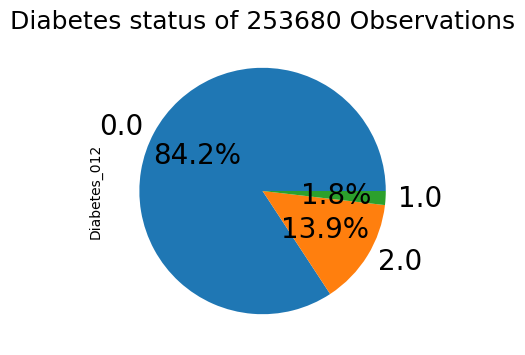

In [15]:
num=axes.plot.pie(autopct='%1.1f%%', fontsize=20, figsize=(4, 4))
num.set_title("Diabetes status of {} Observations".format(df1.shape[0]), fontsize=18)
plt.show()

#  4.2 df2

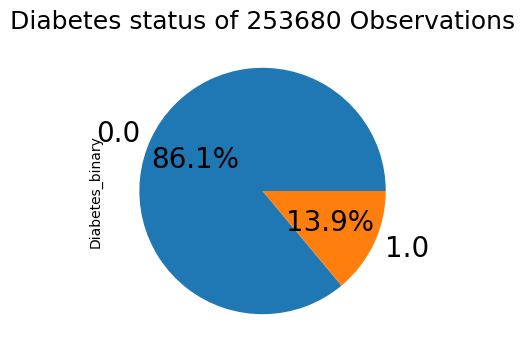

In [16]:
axes = df2.Diabetes_binary.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, figsize=(4, 4))
axes.set_title("Diabetes status of {} Observations".format(df2.shape[0]), fontsize=18)
plt.show()

# 4.3 df3

FINDINGS
1. 50% = No-Diabetes
2. 50% = Diabetes

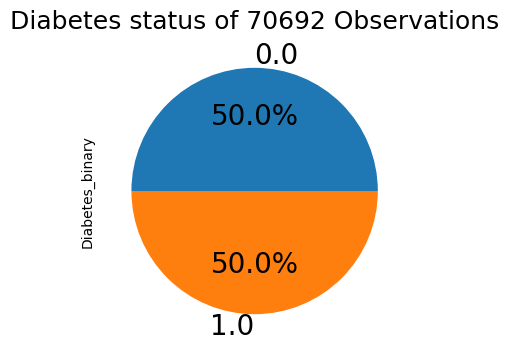

In [17]:

    axes = df3.Diabetes_binary.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, figsize=(4, 4))
    axes.set_title("Diabetes status of {} Observations".format(df3.shape[0]), fontsize=18)
    plt.show()

For the project, we choose df3 data set for the following reasons:
1. The dataset has equal distribution in diabetes vs non-diabtes
2. The predictive model can be more accurate



# 5. Describing the data set

In [74]:
df3.describe()
# 2. The count denotes that there are no missing values

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# 5.1 Visualizing the variables

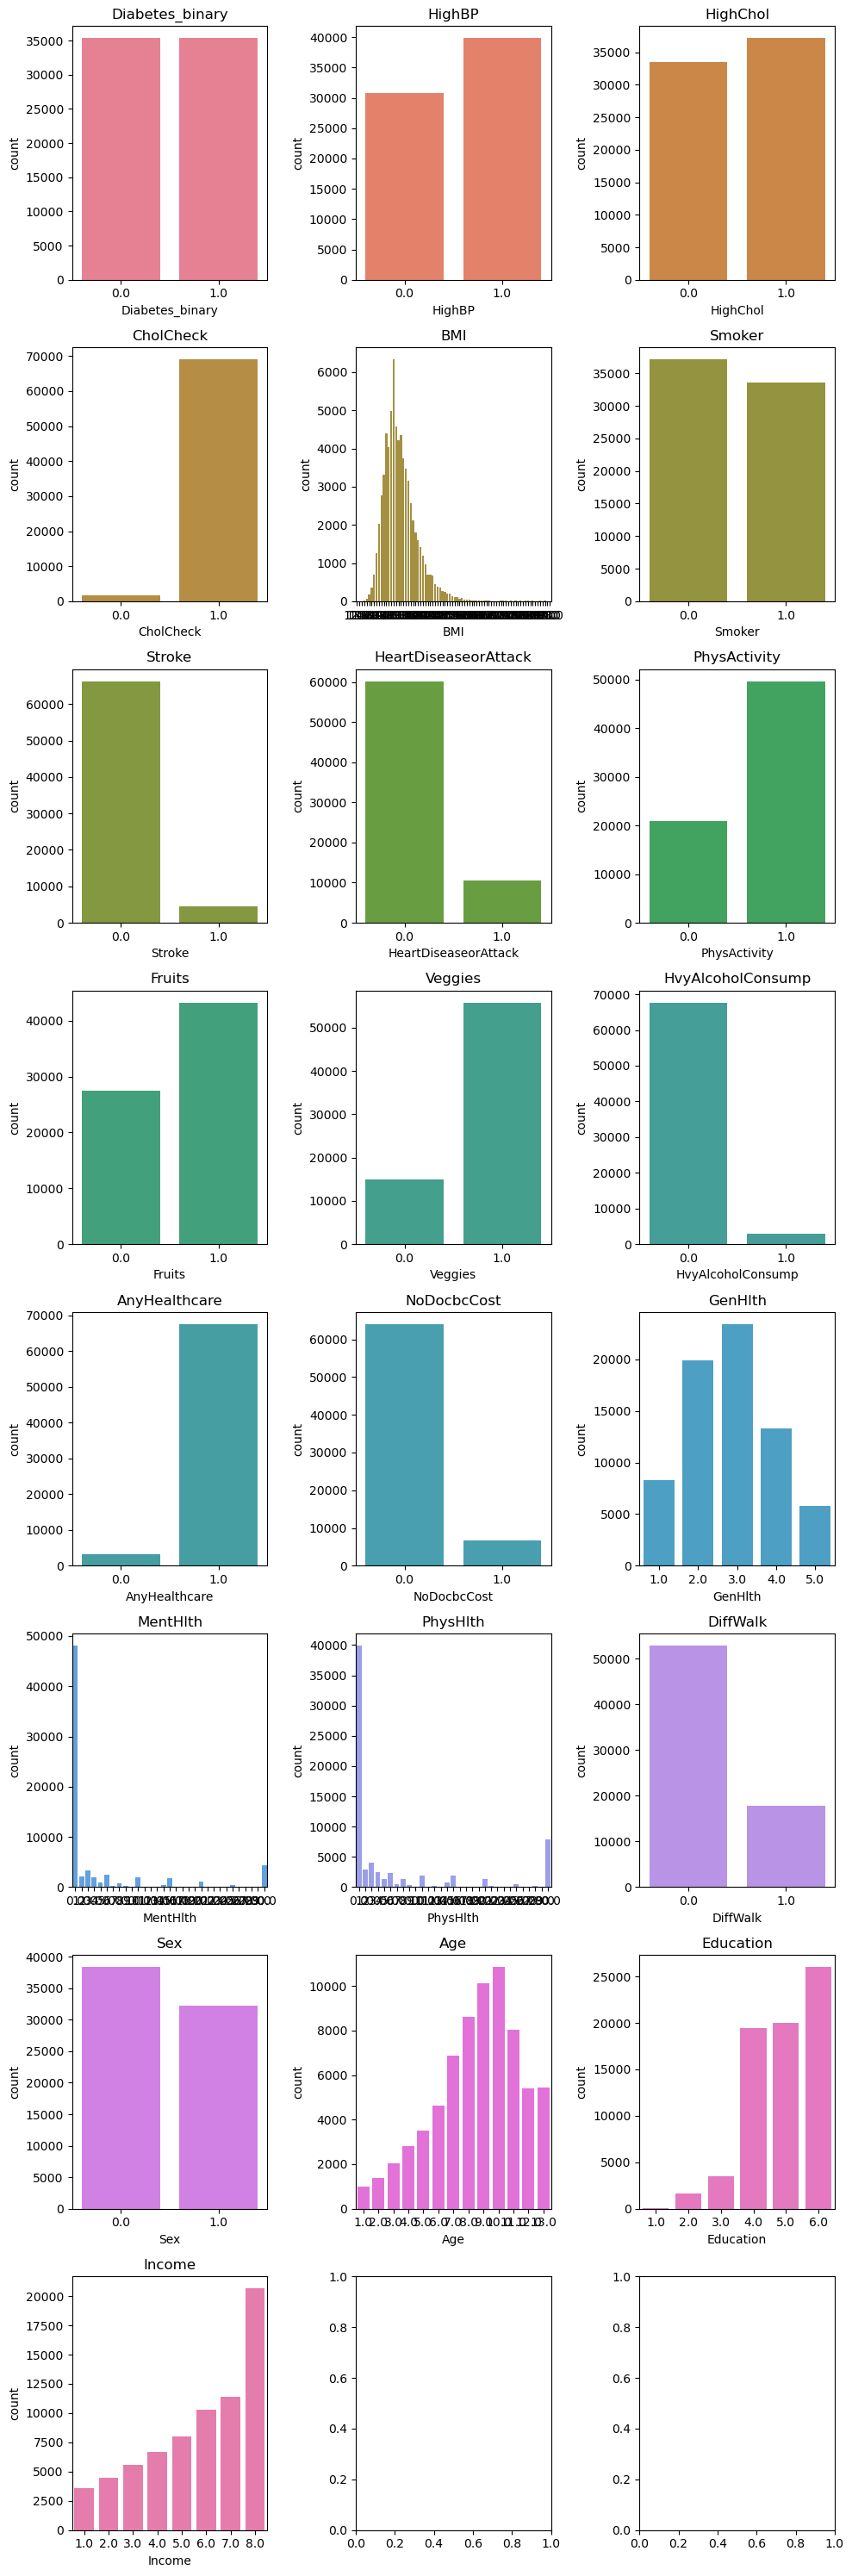

In [38]:

# Create a color palette
colors = sns.color_palette('husl', n_colors=len(df3.columns))

# Create a grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 30))

# Flatten axes to simplify indexing
axes = axes.flatten()

# Loop over variables and plot each one in a separate subplot
for i, col in enumerate(df3.columns):
    sns.countplot(x=col, data=df3, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(col)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#  6. Investigating individual characteristics that may influence Diabetes 

Explanation: The histogram sub-plots take specific features and then count whether the person is healthy ('0') or unwell ('1').

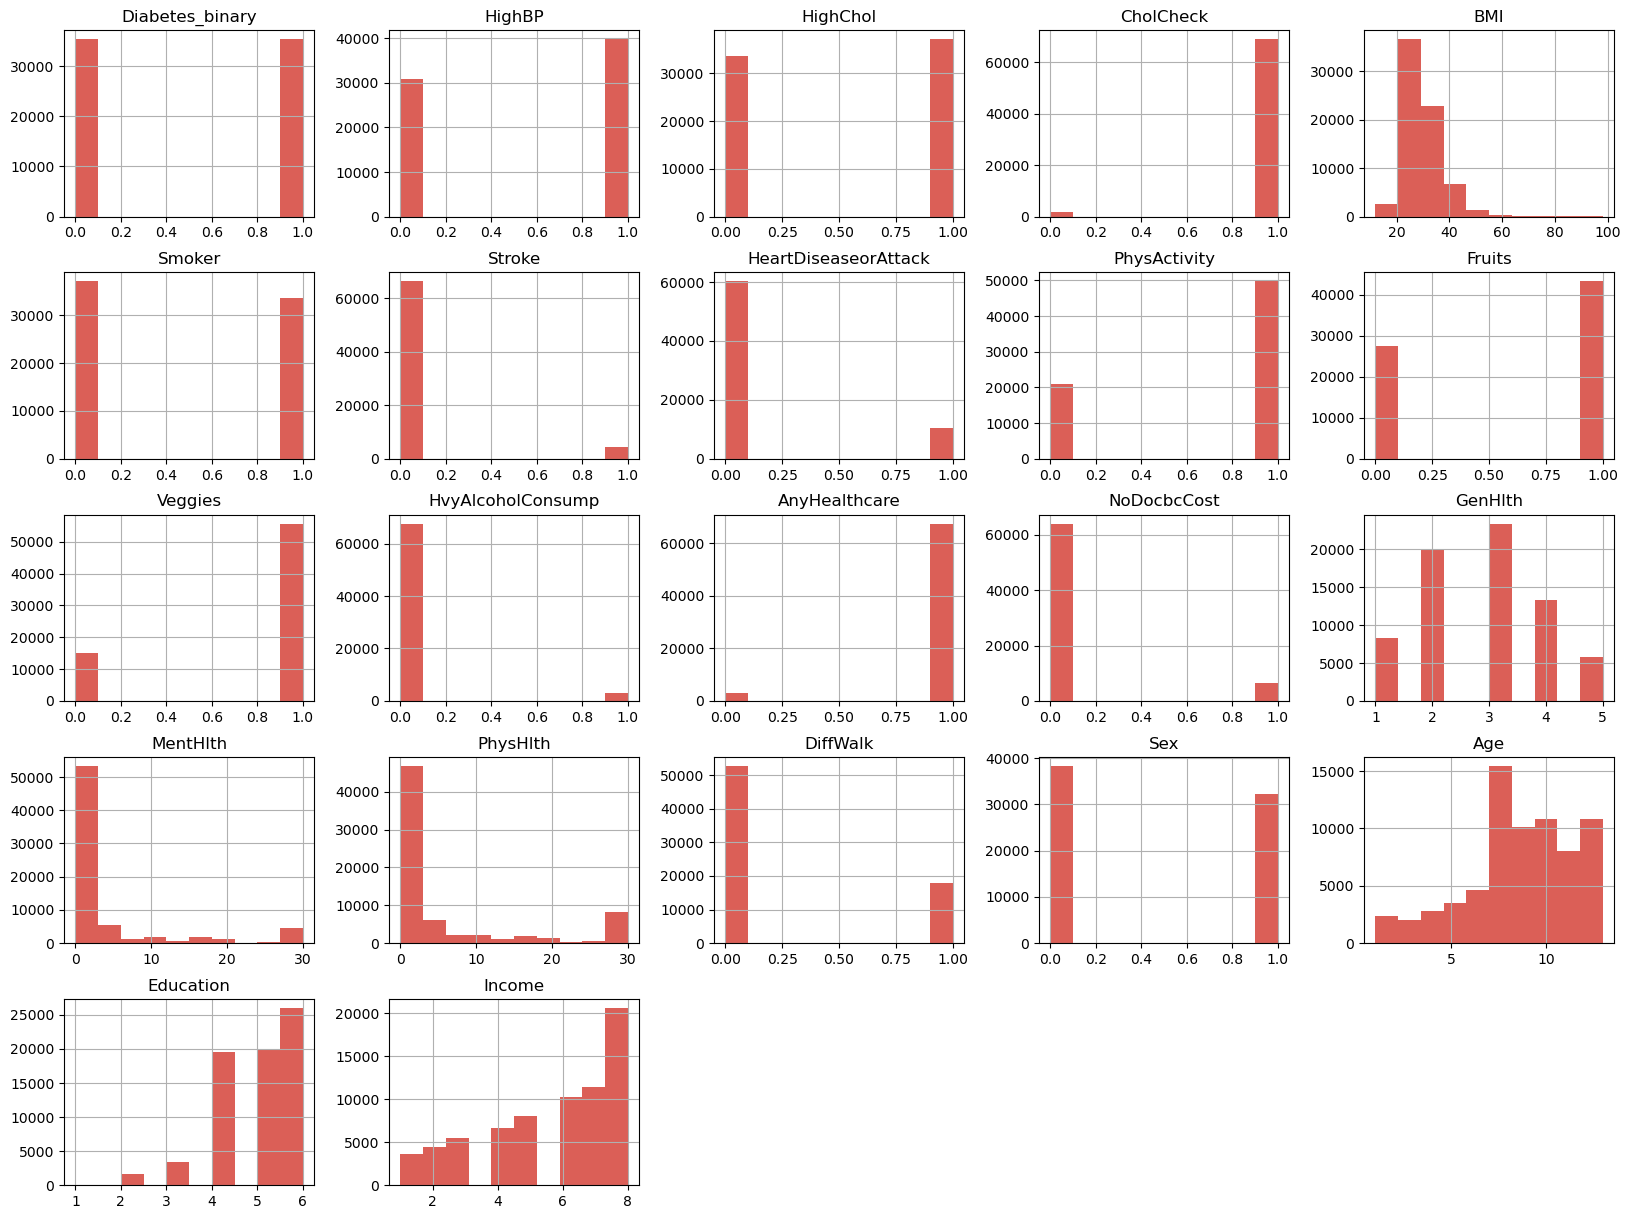

In [9]:
sns.set_palette('hls')
df3.hist(figsize=(20,15));
plt.show()

# 7. Using a count plot to plot binary columns

<Figure size 500x500 with 0 Axes>

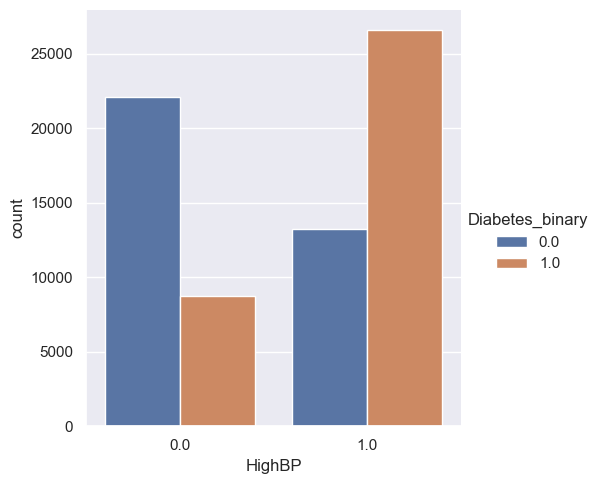

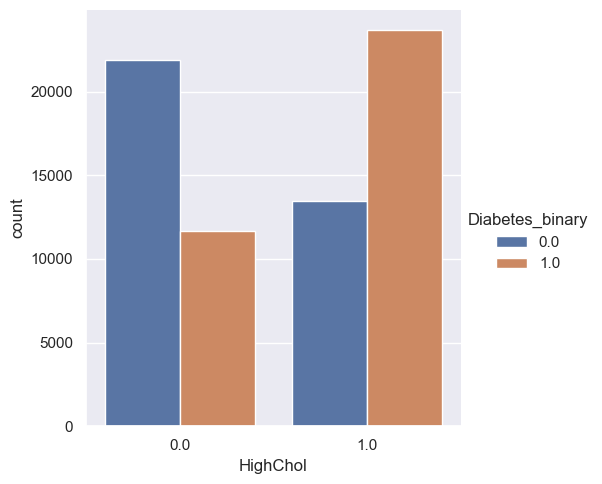

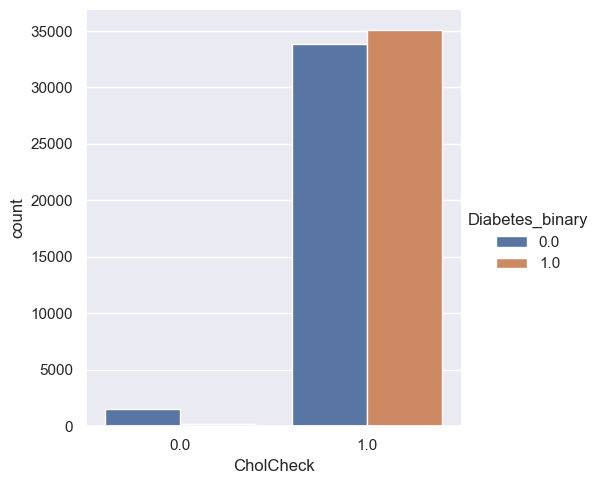

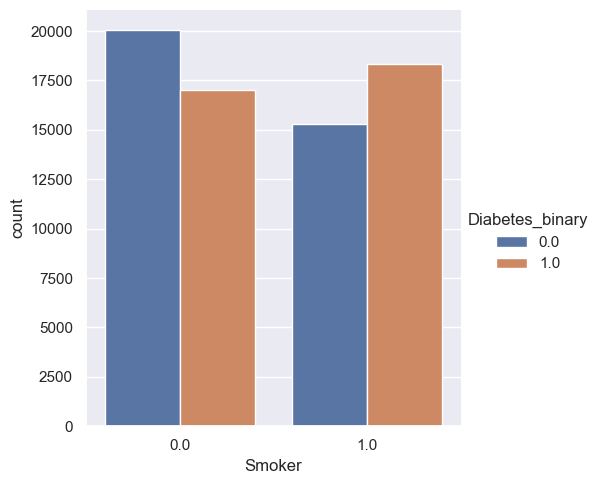

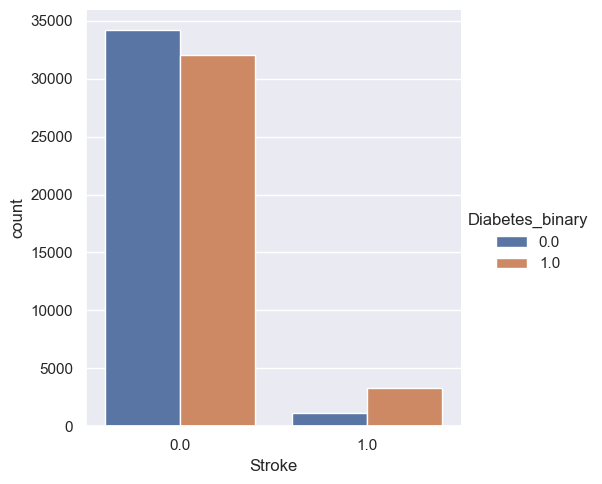

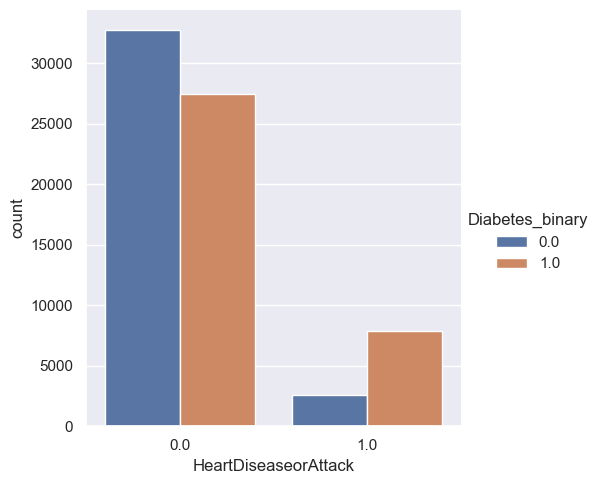

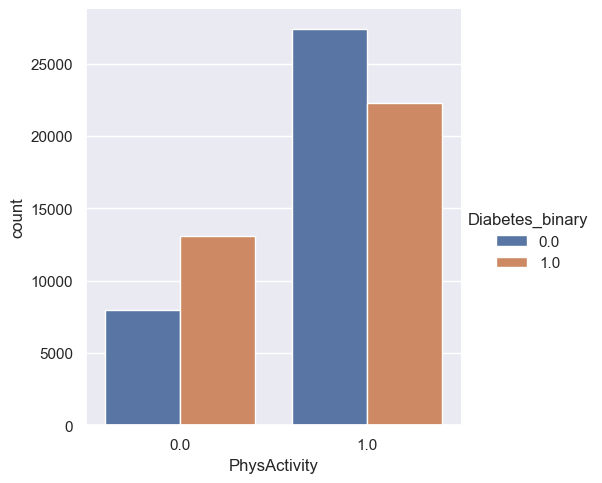

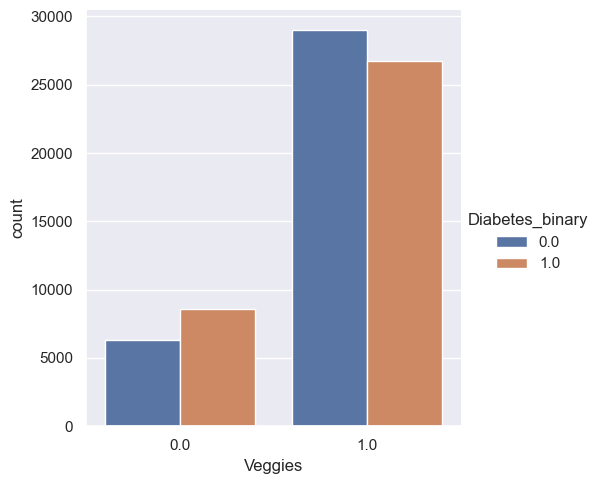

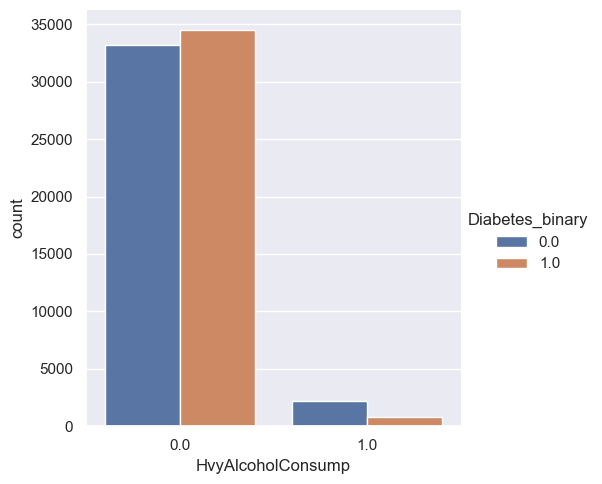

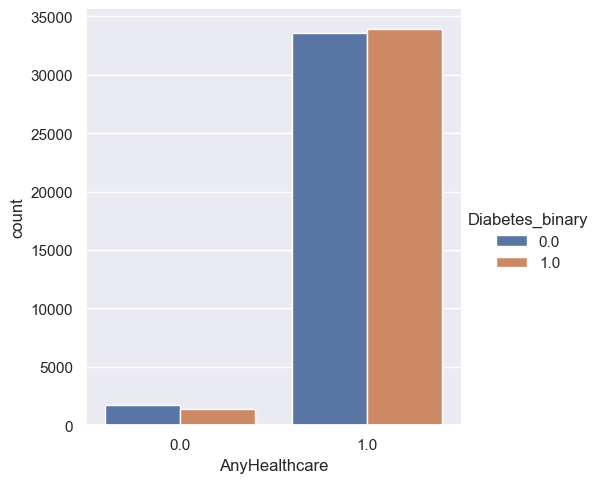

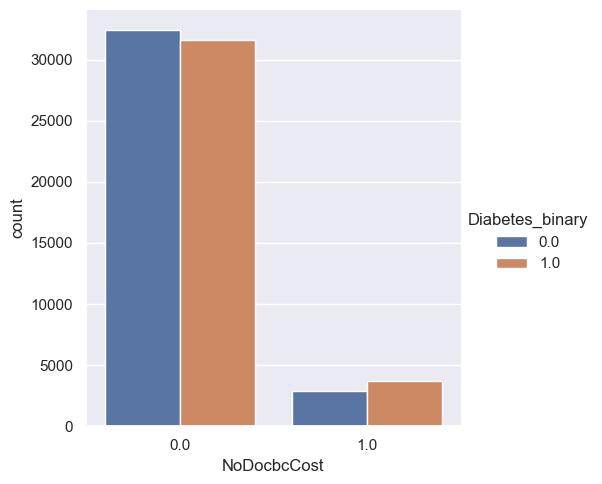

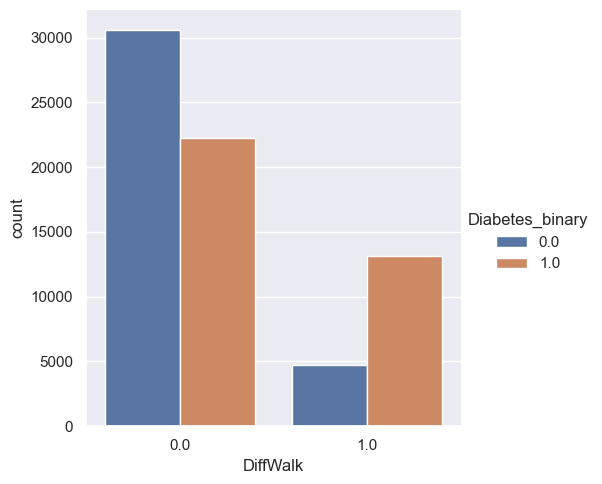

In [28]:
sns.set(color_codes=True)

cols = ['HighBP', 'HighChol', 'CholCheck','Smoker','Stroke','HeartDiseaseorAttack', 'PhysActivity',
        'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

plt.figure(figsize=(5, 5))
for i, col in enumerate(cols):
    plt.subplot
    sns.catplot(x=col, data=df3, kind='count', hue='Diabetes_binary')
 
    plt.show()




# 8. Using a Histogram to plot non-binary columns.

<Figure size 600x600 with 0 Axes>

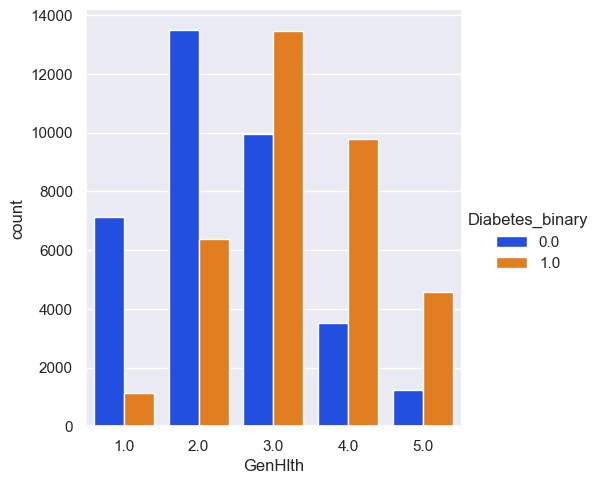

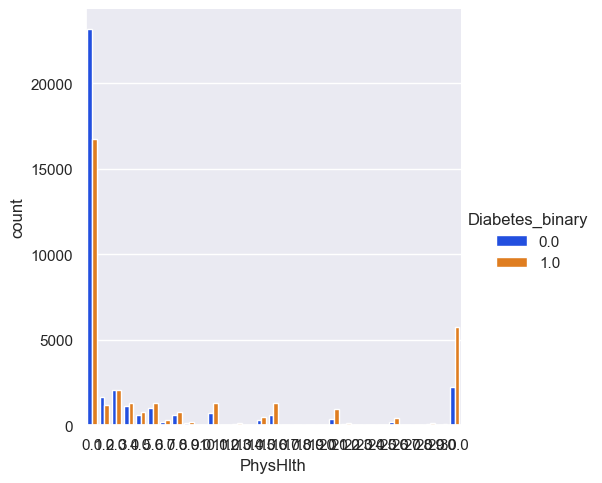

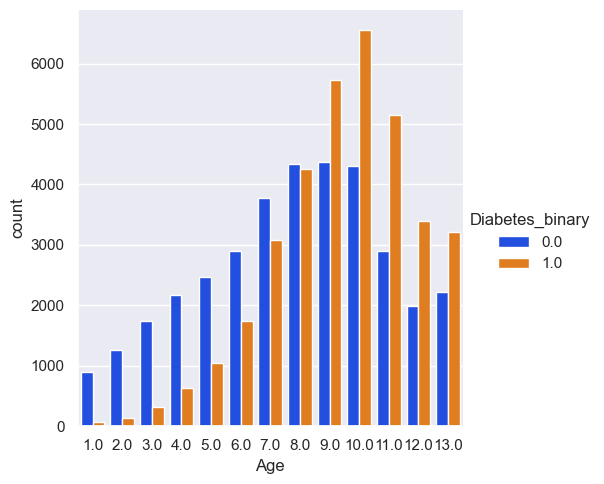

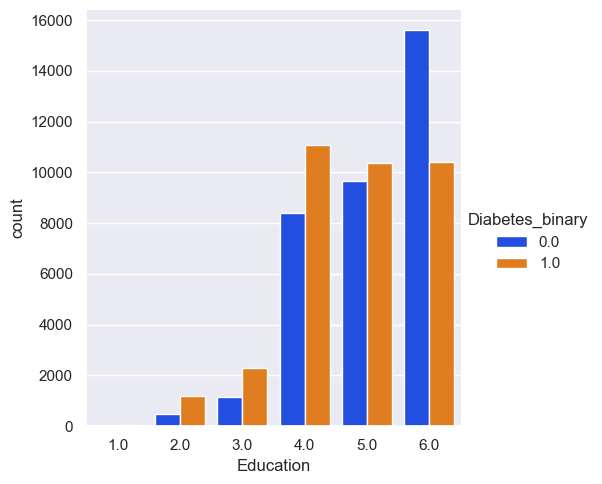

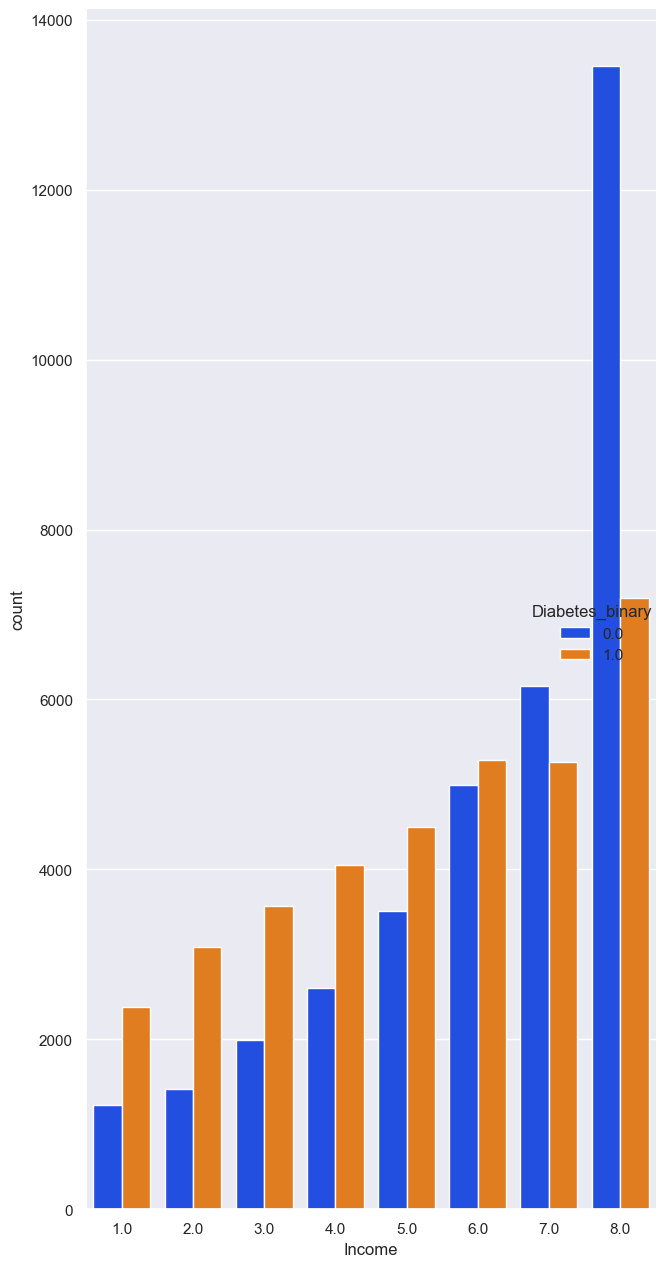

In [32]:
cols = [ 'GenHlth', 'PhysHlth', 'Age', 'Education','Income']
cmap=[ "Cyan", "blue", "Red", "Green", "Purple","Black","Magenta","Orange","Olive", "Brown"]
plt.figure(figsize = (6,6))
for i,col in enumerate(cols):
    
    sns.catplot(data=df3,x = col,kind='count',palette="bright",hue='Diabetes_binary')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.0, top=2.5, wspace=0.6, hspace=0.6)
plt.show()

# 9. Examining non-binary column outliers

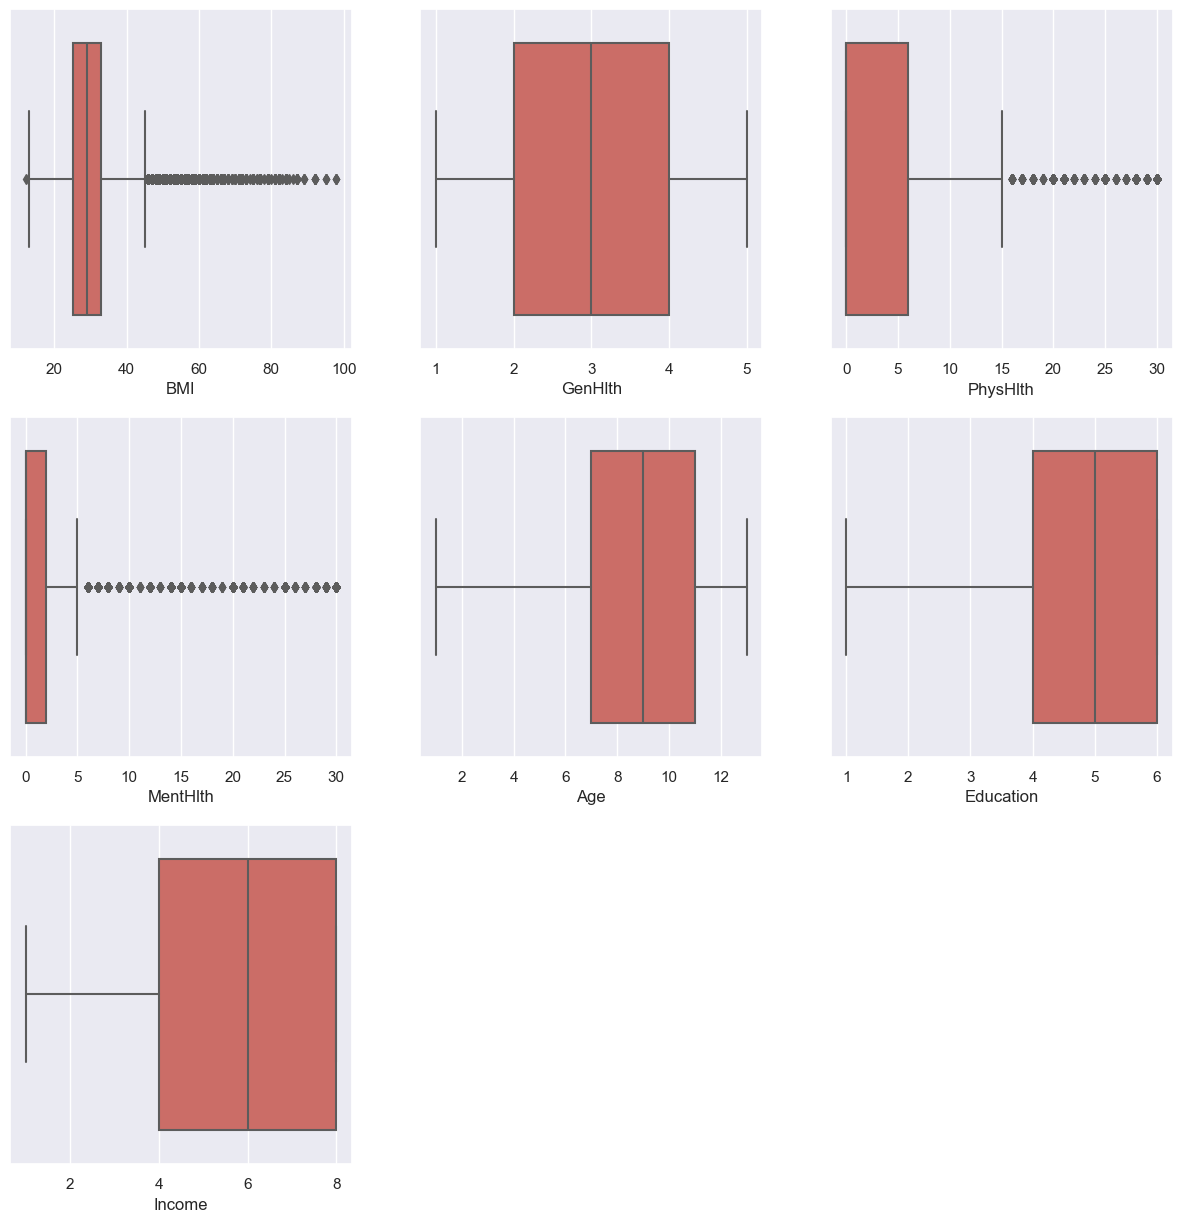

In [22]:
plt.figure(figsize = (15,15))
for i,col in enumerate([ 'BMI', 'GenHlth','PhysHlth','MentHlth', 'Age', 'Education','Income']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col, data = df3 ,palette='hls')
plt.show()

# 10. Examine the Correlation between each dataset column.

Text(0.5, 1.0, 'correlation of feature')

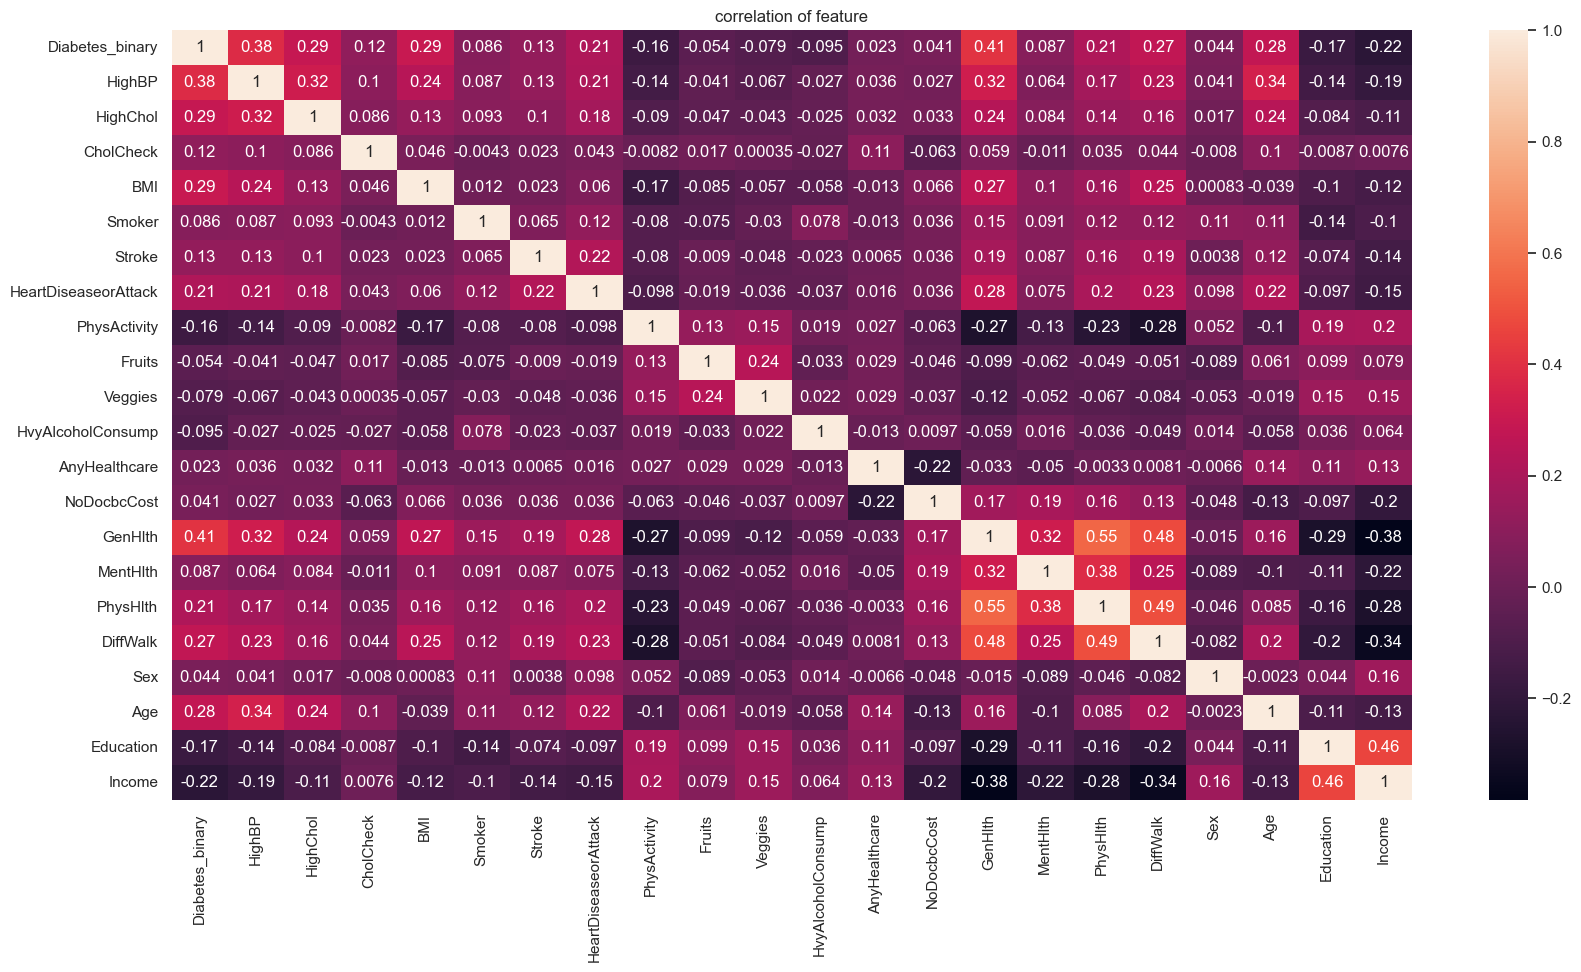

In [23]:
#using heatmap to understand correlation better in dataset data http://localhost:8888/notebooks/Business%20Process%20Analytics.ipynb#10.-Check-The-Correlation-between-each-column-of-the-dataset
#Heatmap of correlation
plt.figure(figsize = (20,10))
sns.heatmap(df3.corr(),annot=True )
plt.title("correlation of feature")

# 11. Top 10 independent variables - X

In [24]:
v = df3.corr()
indicatorList = [ (df3.columns[index],v.Diabetes_binary[df3.columns[index]]) for index in range(0,len(v.Diabetes_binary)) ]
#print(indicatorList)
sortedIndicatorList = sorted(indicatorList, key = lambda x : x[1])[-11:-1]
sortedIndicatorList

[('CholCheck', 0.11538161710270915),
 ('Stroke', 0.12542678468516733),
 ('HeartDiseaseorAttack', 0.21152340436022687),
 ('PhysHlth', 0.21308101903810317),
 ('DiffWalk', 0.272646006159808),
 ('Age', 0.27873806628188813),
 ('HighChol', 0.28921280708865016),
 ('BMI', 0.29337274476103575),
 ('HighBP', 0.3815155489073117),
 ('GenHlth', 0.4076115984949182)]

# 12. Can education levels affect diabetes?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

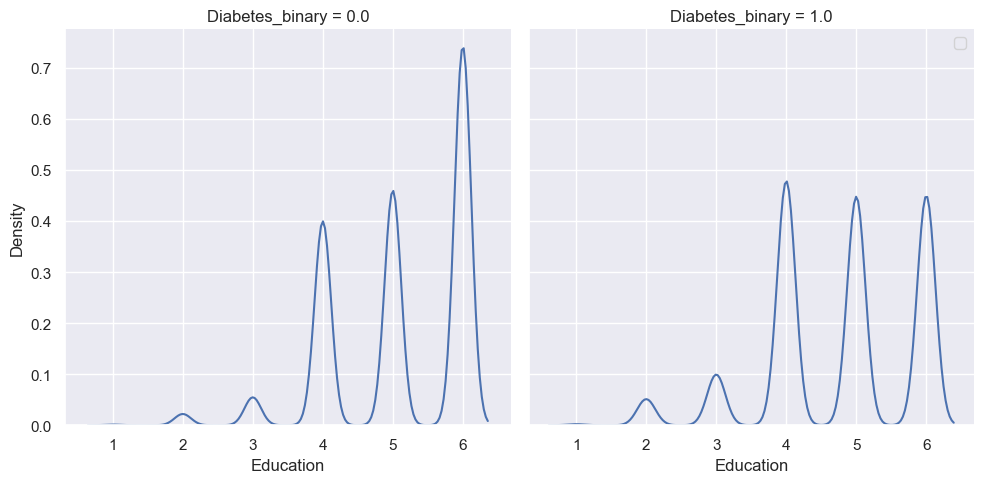

In [25]:
plt.figure(figsize=(10,6))
sns.displot(data=df3, x='Education',col='Diabetes_binary',kind='kde' )
plt.legend()

# 13. Chi-square analysis of independent variables

In [3]:
from sklearn.feature_selection import chi2
from scipy.stats import chisquare, chi2_contingency 

## Stastical test

# setting significance to 0.05
significance = 0.05 

def check_ChiSquareAnalysis(var1, var2, significance_level=0.05):
    tab_class = pd.crosstab(df3[var1], df3[var2], margins=True)
    tab_values = np.array([tab_class.iloc[0].values, tab_class.iloc[1].values])
    
    stat, p, dof, expected_value = chi2_contingency(tab_values)
    
    print(f"p value: {p}") 
    
    if p > significance_level: 
        print('Accept Null Hypothesis')
    else:
        print('Reject NULL HYPOTHESIS') 
        #print('Accepting the Alternative hypothesis')
   

In [4]:
#factors to analysys
check_ChiSquareAnalysis('HighBP', 'HighChol')
check_ChiSquareAnalysis('HighBP', 'Diabetes_binary')
check_ChiSquareAnalysis('HighChol', 'Diabetes_binary')
check_ChiSquareAnalysis('CholCheck', 'HighChol')

p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 3.2830227895667886e-114
Reject NULL HYPOTHESIS


# 14. Knowing the hypothesis status on all independent variables

In [29]:
X = df3.drop('Diabetes_binary', axis=1)
y = df3['Diabetes_binary']

In [30]:
f_score = chi2(X,y)
f_score

(array([4.49179996e+03, 2.80450128e+03, 2.32842928e+01, 1.03128758e+04,
        2.74340616e+02, 1.04297634e+03, 2.69540138e+03, 5.28494034e+02,
        8.02508497e+01, 9.38835007e+01, 6.08852980e+02, 1.71238964e+00,
        1.07550083e+02, 5.13352963e+03, 9.49155526e+03, 5.59290533e+04,
        3.92686533e+03, 7.57164613e+01, 5.20486995e+03, 4.42144248e+02,
        2.95698422e+03]),
 array([0.00000000e+000, 0.00000000e+000, 1.39736531e-006, 0.00000000e+000,
        1.28504517e-061, 8.18377208e-229, 0.00000000e+000, 6.00593668e-117,
        3.29770635e-019, 3.34652092e-022, 1.98714093e-134, 1.90675620e-001,
        3.37273865e-025, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 3.27466230e-018, 0.00000000e+000, 3.69638895e-098,
        0.00000000e+000]))

In [32]:
p_value = pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

HighBP                   0.000000e+00
Age                      0.000000e+00
DiffWalk                 0.000000e+00
PhysHlth                 0.000000e+00
MentHlth                 0.000000e+00
GenHlth                  0.000000e+00
Income                   0.000000e+00
BMI                      0.000000e+00
HighChol                 0.000000e+00
HeartDiseaseorAttack     0.000000e+00
Stroke                  8.183772e-229
HvyAlcoholConsump       1.987141e-134
PhysActivity            6.005937e-117
Education                3.696389e-98
Smoker                   1.285045e-61
NoDocbcCost              3.372739e-25
Veggies                  3.346521e-22
Fruits                   3.297706e-19
Sex                      3.274662e-18
CholCheck                1.397365e-06
AnyHealthcare            1.906756e-01
dtype: float64


In [33]:
p_value_features = p_value.reset_index().rename(columns={'index':'features', 0:'p_value'})
p_value_features['Decision'] = np.where(p_value_features['p_value'] < significance, 'Reject Null Hypothesis', 'Accept Null Hypothesis')

In [34]:
p_value_features

,features,p_value,Decision
0,HighBP,0.000000e+00,Reject Null Hypothesis
1,Age,0.000000e+00,Reject Null Hypothesis
2,DiffWalk,0.000000e+00,Reject Null Hypothesis
3,PhysHlth,0.000000e+00,Reject Null Hypothesis
4,MentHlth,0.000000e+00,Reject Null Hypothesis
5,GenHlth,0.000000e+00,Reject Null Hypothesis
6,Income,0.000000e+00,Reject Null Hypothesis
7,BMI,0.000000e+00,Reject Null Hypothesis
8,HighChol,0.000000e+00,Reject Null Hypothesis
9,HeartDiseaseorAttack,0.000000e+00,Reject Null Hypothesis


# ------------------------------------------------------------------------------------------

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

# ---------------------------------------------------------------------------------------------------------------

# Q1 : WHICH INDICATORS ARE MORE CORRELATED TOWARDS DIABETES?

The output of IMP would typically be a list or an array of values, with each value representing the importance score of a corresponding feature in the input dataset. Higher importance scores indicate higher relevance or correlation of a feature with the target variable in the dataset, as determined by the Random Forest Classifier.

The attributes - [HighBP, BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income ] have a great correlation.

In [37]:
clf = RandomForestClassifier(n_estimators=50)

In [38]:
clf.fit(X,y)

RandomForestClassifier(n_estimators=50)

In [39]:
clf.feature_importances_

array([0.07145809, 0.04039121, 0.00656283, 0.17260195, 0.02869234,
       0.01011967, 0.01889944, 0.02263856, 0.02871103, 0.02171549,
       0.00931805, 0.0074168 , 0.01226725, 0.10716999, 0.05155775,
       0.0699768 , 0.02788624, 0.02488781, 0.12557457, 0.05689465,
       0.08525948])

In [40]:
imp = X.columns[clf.feature_importances_ > 0.05]
imp

Index(['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income'],
      dtype='object')

# ---------------------------------------------------------------------------------------------------------------

# Q2 : WHICH VARIABLES HAS MORE IMPORTANCE ON DIABETES WHILE  PERFORMING PREDICTIVE ANALYTICS?

In [42]:
ndf = X[imp]
ndf.head()

,HighBP,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,1.0,26.0,3.0,5.0,30.0,4.0,6.0,8.0
1,1.0,26.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,26.0,1.0,0.0,10.0,13.0,6.0,8.0
3,1.0,28.0,3.0,0.0,3.0,11.0,6.0,8.0
4,0.0,29.0,2.0,0.0,0.0,8.0,5.0,8.0


In [64]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70692, dtype: float64

In [65]:
a=ndf.isnull().sum()
a


HighBP             0
BMI                0
GenHlth            0
MentHlth           0
PhysHlth           0
Age                0
Education          0
Income             0
Diabetes_binary    0
dtype: int64

In [66]:
ndf.describe()

,HighBP,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,Diabetes_binary
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.563458,29.856985,2.837082,3.752037,5.810417,8.584055,4.920953,5.698311,0.500000
std,0.495960,7.113954,1.113565,8.155627,10.062261,2.852153,1.029081,2.175196,0.500004
min,0.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,25.000000,2.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,29.000000,3.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.500000
75%,1.000000,33.000000,4.000000,2.000000,6.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000,1.000000


# FINDING OUTLIERS USING IQR 

In [43]:
print("*"*70)
print("{:30} : {:5} - {:5} : {:5} : {:5} " .format("Column","25 P", "75 P", "MinIQR", "MaxIQR"))
print("*"*70)

for column in ndf.columns:
    q75,q25 = np.percentile(ndf.loc[:,column],[75,25])
    intr_qr = q75-q25
    maxIQR = q75+(1.5*intr_qr)
    minIQR = q25-(1.5*intr_qr)
    print(f"{column:30} : {q25:5.1f} - {q75:5.1f} : {minIQR:5.1f} : {maxIQR:5.1f}")
    ndf.loc[(ndf[column] < minIQR),column] = np.nan
    ndf.loc[(ndf[column] > maxIQR),column] = np.nan

**********************************************************************
Column                         : 25 P  - 75 P  : MinIQR : MaxIQR 
**********************************************************************
HighBP                         :   0.0 -   1.0 :  -1.5 :   2.5
BMI                            :  25.0 -  33.0 :  13.0 :  45.0
GenHlth                        :   2.0 -   4.0 :  -1.0 :   7.0
MentHlth                       :   0.0 -   2.0 :  -3.0 :   5.0
PhysHlth                       :   0.0 -   6.0 :  -9.0 :  15.0
Age                            :   7.0 -  11.0 :   1.0 :  17.0
Education                      :   4.0 -   6.0 :   1.0 :   9.0
Income                         :   4.0 -   8.0 :  -2.0 :  14.0


C:\Users\kdarw\AppData\Local\Temp\ipykernel_23064\2930194508.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.loc[(ndf[column] < minIQR),column] = np.nan
C:\Users\kdarw\AppData\Local\Temp\ipykernel_23064\2930194508.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.loc[(ndf[column] > maxIQR),column] = np.nan


In [46]:
ndf.loc[:,'Diabetes_binary'] = y

C:\Users\kdarw\AppData\Local\Temp\ipykernel_23064\2722234827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.loc[:,'Diabetes_binary'] = y


In [47]:
#checking if dataframe has any missing values in any column
for column in ndf:
    print(f'{column:30} (NA/NULL): {ndf[column].isna().sum():8} /{ndf.shape[0]:7}')

HighBP                         (NA/NULL):        0 /  70692
BMI                            (NA/NULL):     2181 /  70692
GenHlth                        (NA/NULL):        0 /  70692
MentHlth                       (NA/NULL):    11816 /  70692
PhysHlth                       (NA/NULL):    10624 /  70692
Age                            (NA/NULL):        0 /  70692
Education                      (NA/NULL):        0 /  70692
Income                         (NA/NULL):        0 /  70692
Diabetes                       (NA/NULL):        0 /  70692
Diabetes_BIN                   (NA/NULL):        0 /  70692
Diabetes_binary                (NA/NULL):        0 /  70692


# Dropping null values 

In [66]:
ndf.dropna(inplace=True)

C:\Users\kdarw\AppData\Local\Temp\ipykernel_23064\1446095272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.dropna(inplace=True)


In [67]:
# After removing Outliers, Selecting X and y
NX = ndf.drop(['Diabetes','Diabetes_BIN','Diabetes_binary'], axis=1)
Ny = ndf['Diabetes_binary']

In [68]:
NX.isnull().sum()

HighBP       0
BMI          0
GenHlth      0
MentHlth     0
PhysHlth     0
Age          0
Education    0
Income       0
dtype: int64

# Training the data set

In [69]:
X_train, X_test, y_train, y_test = train_test_split(NX, Ny, test_size=0.3, random_state=42)
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (36255, 8)
Shape of the y_train (36255,)
Shape of the X_test (15538, 8)
Shape of the y_test (15538,)


#### We have Used these Machine Learning models
    - LogisticRegression 
    - GaussianNB
    - RandomForestClassifier
    - DecisionTreeClassifier
    - XGBClassifier

In [70]:
algos = [LogisticRegression(solver='lbfgs',max_iter=7600), 
         GaussianNB(),
         RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
         DecisionTreeClassifier(max_depth=5),
         XGBClassifier(max_depth=4, n_estimators=500,use_label_encoder=False,),]

nameList = ['Logistic_Regression','Guassian','RandomForest','Decision_Tree', 'Xgboost']
rocList = []
timeList = []

In [71]:
for name in algos:
    model = name
    startTime = time.time()
    model.fit(X_train,y_train)
    endTime = time.time()
    y_pred = model.predict_proba(X_test)[:,1]
    score= roc_auc_score(y_test,y_pred)
    rocList.append(score)
    timeList.append(endTime-startTime)

C:\Users\kdarw\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [73]:
evaluation = pd.DataFrame({'Model': nameList,'Score':rocList, 'Time' : timeList  })
evaluation = evaluation.sort_values(by='Score', ascending=False)
evaluation

,Model,Score,Time
0,Logistic_Regression,0.812961,0.293923
2,RandomForest,0.808004,18.702289
4,Xgboost,0.805986,8.616907
3,Decision_Tree,0.800786,0.057842
1,Guassian,0.796576,0.018993


# Q3. Time and accuracy of the model.
1. The table represents the performance of different classification models on a dataset, as measured by their accuracy score and training time.

2. Based on the table, we can see that the Logistic Regression model achieved the highest accuracy score of 0.812961, followed by the RandomForest and Xgboost models with scores of 0.808004 and 0.805986, respectively. The Decision Tree and Gaussian Naive Bayes models had lower scores of 0.800786 and 0.796576, respectively.

3. In terms of training time, the Decision Tree and Gaussian Naive Bayes models were the fastest, taking only 0.057842 and 0.018993 seconds, respectively. The Logistic Regression model took longer to train, but still relatively fast, at 0.293923 seconds. The RandomForest and Xgboost models were the slowest, taking 18.702289 and 8.616907 seconds, respectively.

4. Overall, the Logistic Regression model performed the best in terms of accuracy, while the Gaussian Naive Bayes model was the fastest to train. The RandomForest and Xgboost models may have lower accuracy scores than the Logistic Regression model, but they may be useful for datasets with more complex relationships between the features and the outcome. The Decision Tree model may be a good choice for simple datasets that require fast training and prediction.

# Q4. What are the applications to utilize develop this predictive model?

1. Data set  -  Kaggle
2. Language  -  Python
3. Module    -  Pandas, Numpy, scikit-learn, Matplotlib, Seaborn
4. Editor    -  Jupyter-Notebook
5. Regression models :
    - LogisticRegression 
    - GaussianNB
    - RandomForestClassifier
    - DecisionTreeClassifier
    - XGBClassifier